In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [9]:
# Load data (assuming CSV format for simplicity)
data = pd.read_excel('/Users/sindhujach/Desktop/ECE_699/Traffic_simulation/Weeklytask-30-10-23/features.xlsx')
data.head()


,id,x,y,angle,type,speed,pos,lane,time,lane_id,lane_length,lane_change,vehicle_density,avg_speed_nearby_vehicles,collision
0,flow_aggressive_E.0,94.90,101.6,270.0,aggressive,11.54,5.10,-E31_1,0,-E31_1,89.16,0,0.011216,11.540000,0
1,flow_aggressive_E.0,83.36,101.6,270.0,aggressive,11.54,16.64,-E31_1,1,-E31_1,89.16,0,0.022432,7.450000,0
2,flow_aggressive_E.0,71.78,101.6,270.0,aggressive,11.58,28.22,-E31_1,2,-E31_1,89.16,0,0.022432,7.350000,0
3,flow_aggressive_E.0,60.11,101.6,270.0,aggressive,11.67,39.89,-E31_1,3,-E31_1,89.16,0,0.022432,8.100000,0
4,flow_aggressive_E.0,48.40,101.6,270.0,aggressive,11.71,51.60,-E31_1,4,-E31_1,89.16,0,0.033647,8.033333,0


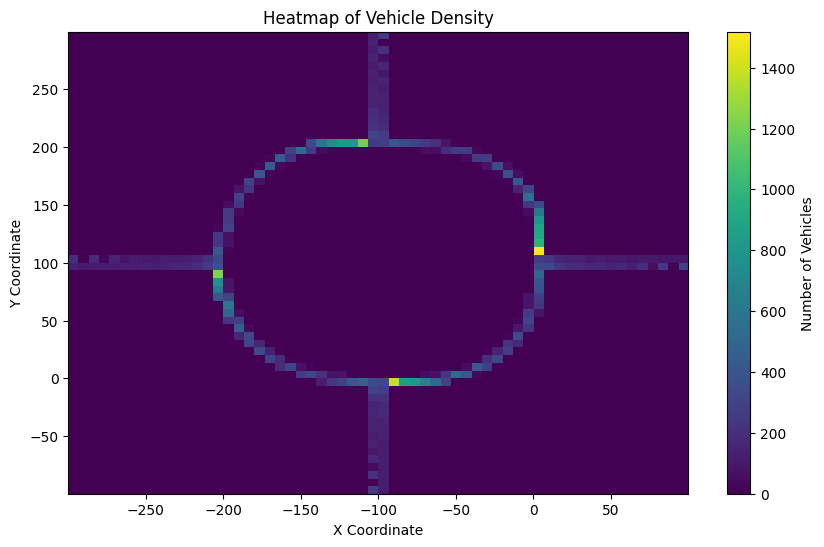

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D histogram
H, xedges, yedges = np.histogram2d(data['x'], data['y'], bins=(60, 60))

# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(H, interpolation='nearest', origin='lower', aspect='auto',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Number of Vehicles')
plt.title('Heatmap of Vehicle Density')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [18]:
grouped_stats = data.groupby('type').describe()[['speed', 'lane_change', 'collision']]
print(grouped_stats)

                 speed                                                         \
                 count      mean       std  min     25%   50%      75%    max   
type                                                                            
aggressive      8951.0  8.099507  4.580575  0.0  4.8650  7.78  12.3300  17.78   
default        13603.0  7.715680  4.585848  0.0  4.2700  7.87  11.8750  17.67   
distracted     10101.0  7.410313  4.118677  0.0  4.5200  7.39  10.7900  18.34   
inexperienced  10918.0  7.059763  3.765064  0.0  4.5225  7.19   9.8275  17.03   
passive         4227.0  8.191817  3.550767  0.0  6.1450  8.44  10.7550  17.17   
speeder         9055.0  8.322515  4.113038  0.0  5.1500  8.80  11.8700  17.53   
tailgater       7076.0  8.667743  4.005867  0.0  5.8800  8.95  12.0300  18.05   

              lane_change            ...           collision            \
                    count      mean  ...  75%  max     count      mean   
type                                 ... 

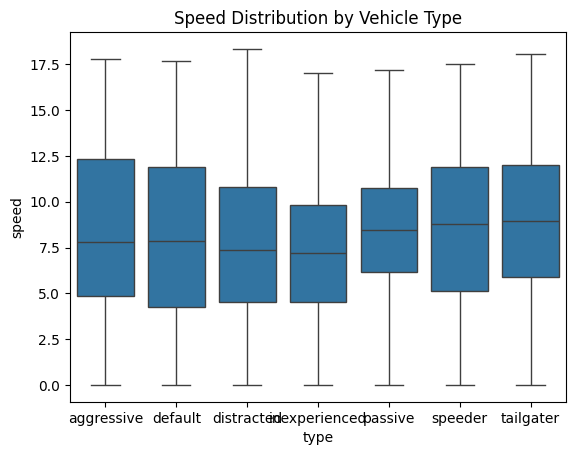

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data, x='type', y='speed')
plt.title('Speed Distribution by Vehicle Type')
plt.show()


In [4]:
scaler = StandardScaler()
data = data.drop('id', axis = 1)
data = data.drop('lane', axis = 1)
data = data.drop('lane_id', axis = 1)
data = data.drop('type', axis = 1)
data_scaled = scaler.fit_transform(data.drop('collision', axis=1))  # Assuming 'collision' is your target column
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])  # Without the target column

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['collision'], test_size=0.3, random_state=42)

In [6]:
# Model Training using Random Forest as an example
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Prediction
y_pred = clf.predict(X_test)

In [8]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9990615224191867
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19159
           1       1.00      0.14      0.25        21

    accuracy                           1.00     19180
   macro avg       1.00      0.57      0.62     19180
weighted avg       1.00      1.00      1.00     19180

